In [2]:
from perlin_noise import PerlinNoise

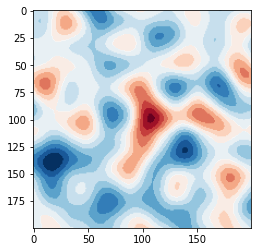

In [59]:
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise

noise = PerlinNoise(octaves=5, seed=5)

xpix, ypix = 200, 200
pic = []
for i in range(xpix):
    row = []
    for j in range(ypix):
        noise_val = noise([i/xpix, j/ypix]) - noise([i/xpix, j/ypix])%0.08
        row.append(noise_val)
    pic.append(row)

plt.imshow(pic, cmap='RdBu')
plt.show()

In [30]:
pic

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -5.0,
  -5.0,
  -5.0,
  -5.0,
  -